In [1]:
"""
Simple examples of convolution to do some basic filters
Also demonstrates the use of TensorFlow data readers.

We will use some popular filters for our image.
It seems to be working with grayscale images, but not with rgb images.
It's probably because I didn't choose the right kernels for rgb images.

kernels for rgb images have dimensions 3 x 3 x 3 x 3
kernels for grayscale images have dimensions 3 x 3 x 1 x 1

"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import sys
sys.path.append('..')

from matplotlib import gridspec as gridspec
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

import kernels

In [2]:
def read_one_image(filename):
    ''' This method is to show how to read image from a file into a tensor.
    The output is a tensor object.
    '''
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_image(image_string)
    image = tf.cast(image_decoded, tf.float32) / 256.0
    return image

def convolve(image, kernels, rgb=True, strides=[1, 3, 3, 1], padding='SAME'):
    images = [image[0]]
    for i, kernel in enumerate(kernels):
        filtered_image = tf.nn.conv2d(image, 
                                      kernel, 
                                      strides=strides,
                                      padding=padding)[0]
        if i == 2:
            filtered_image = tf.minimum(tf.nn.relu(filtered_image), 255)
        images.append(filtered_image)
    return images

def show_images(images, rgb=True):
    gs = gridspec.GridSpec(1, len(images))
    for i, image in enumerate(images):
        plt.subplot(gs[0, i])
        if rgb:
            plt.imshow(image)
        else: 
            image = image.reshape(image.shape[0], image.shape[1])
            plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [3]:
def show_images_v2(images, rgb=True, cols=1):
    n_images=len(images)

    fig = plt.figure()
    
    for i in range(n_images):
        ax = fig.add_subplot(cols,np.ceil(n_images/float(cols)), i+1)
        if rgb:
            ax.imshow(images[i])
        else:
            ax.imshow(images[i], cmap='Greys_r')
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [4]:
def main(imagepath):
    rgb = False
    if rgb:
        kernels_list = [kernels.BLUR_FILTER_RGB, 
                        kernels.SHARPEN_FILTER_RGB, 
                        kernels.EDGE_FILTER_RGB,
                        kernels.TOP_SOBEL_RGB,
                        kernels.EMBOSS_FILTER_RGB]
    else:
        kernels_list = [kernels.BLUR_FILTER,
                        kernels.SHARPEN_FILTER,
                        kernels.EDGE_FILTER,
                        kernels.TOP_SOBEL,
                        kernels.EMBOSS_FILTER]

    kernels_list = kernels_list[1:]
    image = read_one_image(imagepath)
    if not rgb:
        image = tf.image.rgb_to_grayscale(image)
    image = tf.expand_dims(image, 0) # make it into a batch of 1 element
    images = convolve(image, kernels_list, rgb)
    with tf.Session() as sess:
        images = sess.run(images) # convert images from tensors to float values
    show_images(images, rgb)

In [5]:
!ls ../data

C.csv				      mossy_rocks_landscape.jpg
CAT.csv				      puppy1200x650.jpg
KO.csv				      puppy424x640.jpg
MacroTrends_AAL.csv		      puppy483x720.jpg
UTX.csv				      stock_market_data-AAL.csv
aal.us.txt			      t10k-images-idx3-ubyte.gz
birth_weight.csv		      t10k-labels-idx1-ubyte.gz
green-cascading-waterfall.jpg	      train-images-idx3-ubyte.gz
hpq.us.txt			      train-labels-idx1-ubyte.gz
international-airline-passengers.csv


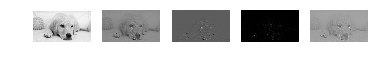

In [6]:
main('../data/puppy1200x650.jpg')